In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize

# Load the data
data = pd.read_csv('equinox.csv')

# Step 2: Pre-process data
# 2.1 Drop column with all NaN values
data = data.dropna(axis=1, how='all')

# 2.2 Handling missing values by imputing mean values
columns_to_drop = ['classname', 'bugs', 'nonTrivialBugs', 'majorBugs', 'criticalBugs', 'highPriorityBugs']
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data.drop(columns=columns_to_drop))

X = pd.DataFrame(imputed_data, columns=data.drop(columns=columns_to_drop).columns)
y = data['bugs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
clf = KNeighborsClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Test the classifier
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Evaluate the classifier using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy:  0.6615384615384615
              precision    recall  f1-score   support

           0       0.73      0.95      0.82        39
           1       0.50      0.40      0.44        15
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1

    accuracy                           0.66        65
   macro avg       0.20      0.22      0.21        65
weighted avg       0.55      0.66      0.60        65

Accuracy: 0.6615384615384615


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

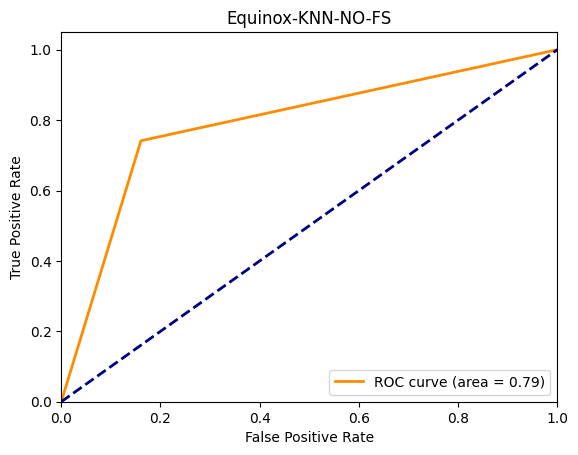

In [5]:
# Assume y_test is your ground truth and y_pred is the predicted outputs
# Binarize the labels for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # replace [0, 1, 2] with your classes
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])  # replace [0, 1, 2] with your classes

n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#Save AUC values
df = pd.DataFrame({
    'AUC': roc_auc["micro"],
    'FPR': fpr["micro"],
    'TPR': tpr["micro"]
})
df.to_csv('./AUC_Extracts/Equinox/Equinox_KNN_NO_FS.csv', index=False)

# Plot the ROC curve
plt.figure()
lw = 2  # Line width
plt.plot(fpr["micro"], tpr["micro"],
         color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Equinox-KNN-NO-FS')
plt.legend(loc="lower right")
plt.show()